In [1]:
#importing libary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:

data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


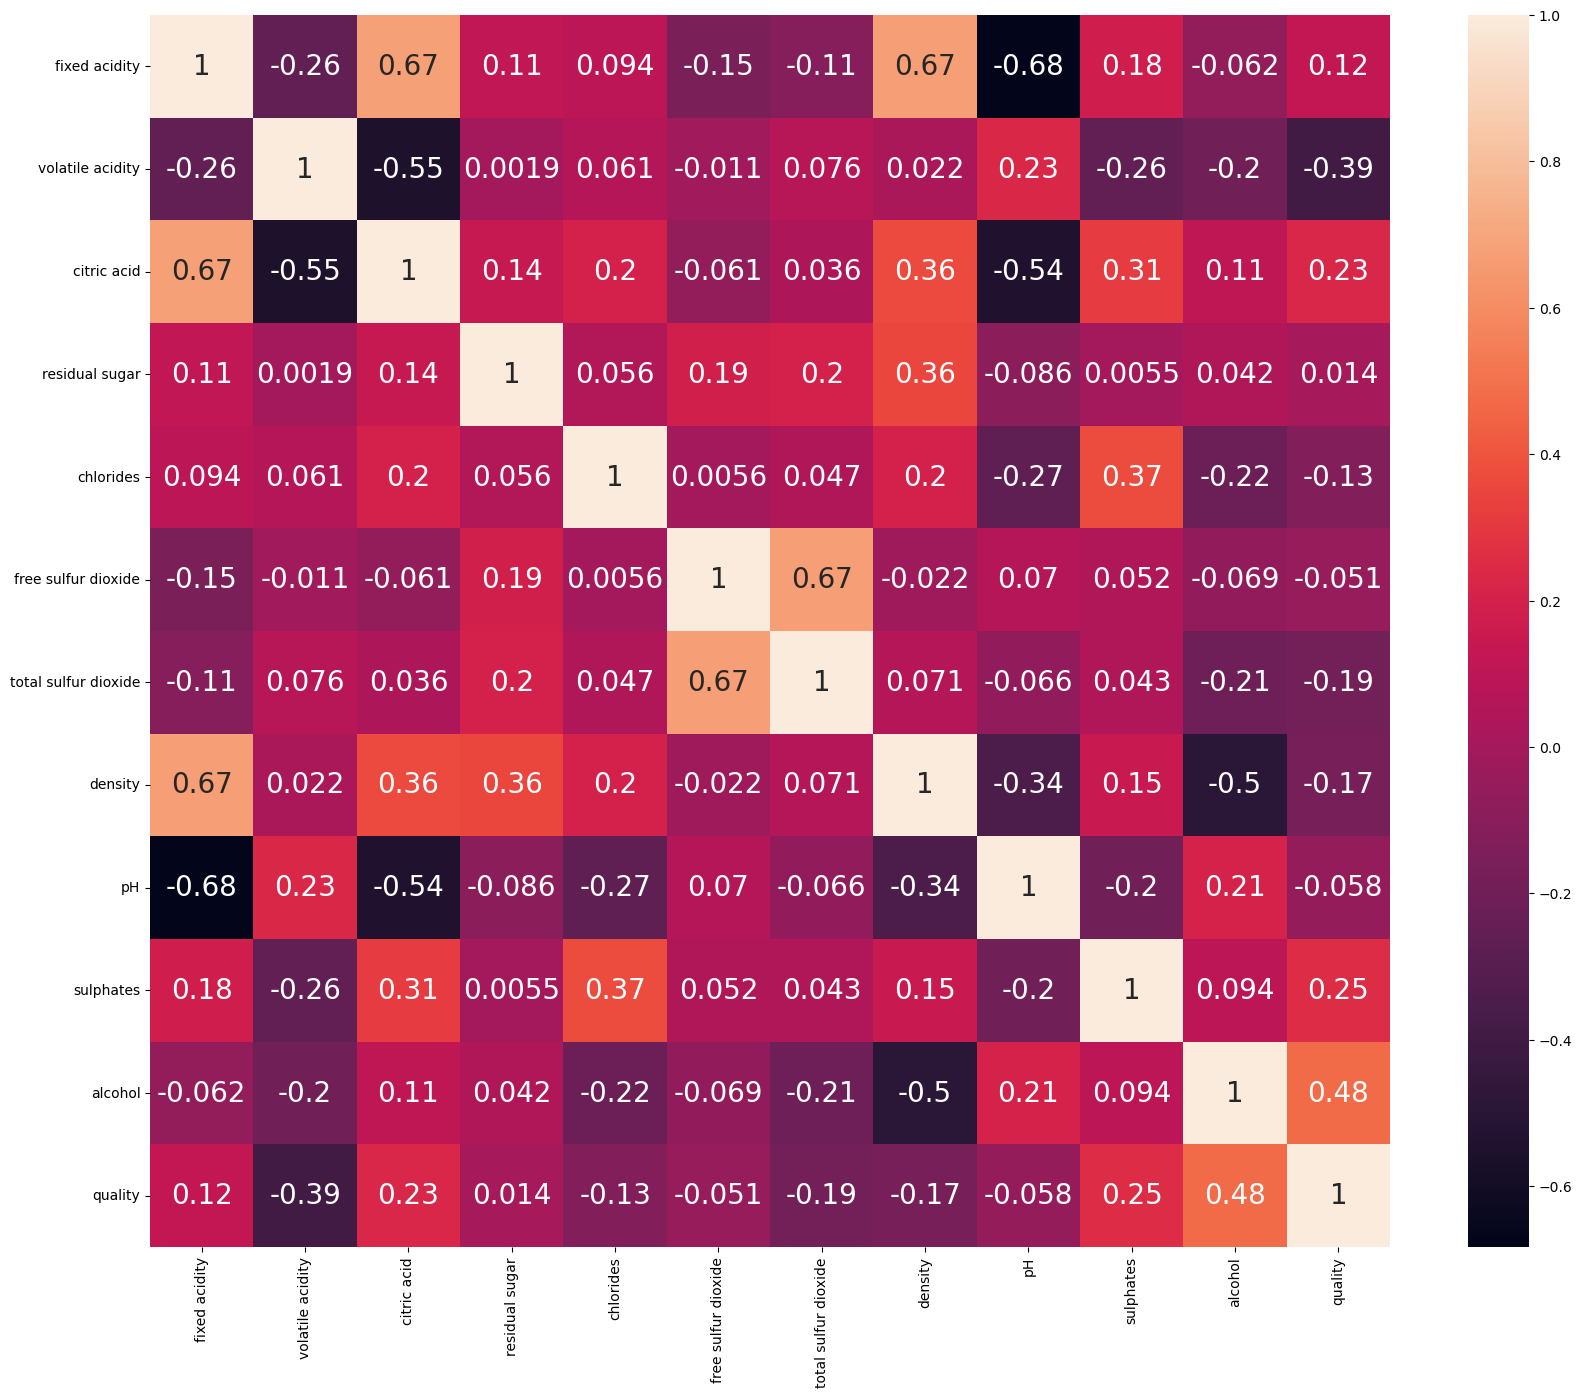

In [3]:
# plotting Heatmap correlation

data_cor= data.corr() # checking relationship

plt.figure(figsize=(20,16))
sns.heatmap(data_cor, annot=True, annot_kws={'size':20})
plt.show()

In [4]:
X = data.drop("quality", axis=1)
y = data.quality


In [5]:
# applying standard scaler

scalar= StandardScaler()
X_scaler= scalar.fit_transform(X)

In [6]:
# train test split

x_train,x_test,y_train,y_test= train_test_split(X_scaler, y, test_size=0.25, random_state=42)

In [7]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred= clf.predict(x_train)
        
        print("\n Train Result:")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred= clf.predict(x_test)
        
        print("\n Test Result:")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        
        print('\n \n Test classification report \n',classification_report(y_test,pred, digits=2))
        

In [8]:
#model training
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:100.00%

 Test Result:
Accuracy Score:59.25%

 
 Test classification report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.22      0.15      0.18        13
           5       0.68      0.69      0.68       164
           6       0.61      0.55      0.58       169
           7       0.45      0.60      0.52        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.60      0.59      0.59       400



In [10]:
# trying to get more accuracy by applying hyperparameter tunning

para= {
    'criterion':['gini','entropy'],
    'max_depth':range(10,15),
    'min_samples_leaf':range(2,10),
    'min_samples_split':range(4,10),
    
}

In [11]:
grid_search= GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=para, cv=6)


In [12]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(4, 10)})

In [13]:
best_para= grid_search.best_params_
best_para

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [14]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf=3,min_samples_split=6)

# training model by applying best parameter
clf.fit(x_train,y_train)

metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)



 Train Result:
Accuracy Score:87.82%

 Test Result:
Accuracy Score:57.00%

 
 Test classification report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.15      0.14        13
           5       0.65      0.70      0.67       164
           6       0.60      0.52      0.56       169
           7       0.44      0.50      0.47        48
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.30      0.31      0.31       400
weighted avg       0.58      0.57      0.57       400



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


lr= LogisticRegression()
rm= RandomForestClassifier()
knn= KNeighborsClassifier()
dt = DecisionTreeClassifier()

lr.fit(x_train,y_train)
rm.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
print('All model are trained.')

lr.score(x_test,y_test)
dt.score(x_test,y_test)
rm.score(x_test,y_test)
knn.score(x_test,y_test)

print("Test Score are stored.")

All model are trained.
Test Score are stored.


In [ ]:
# ROC AUC curve on test data for all models

dis =plot_roc_curve(estimator='gini',dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test, ax=dis.ax_)
plot_roc_curve(rm,x_test,y_test, ax=dis.ax_)
plot_roc_curve(knn,x_test,y_test, ax=dis.ax_)

plt.legend(prop={'size':15}, loc='lower right')

plt.show()
